In [12]:
#import libs and tools
import warnings
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
from pandas import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [21]:
df_arima = pd.read_csv('c:/Users/ThinkPad/Desktop/models/data_after_preprocessing.csv',float_precision='round_trip')
df_arima['timestamp'] = pd.to_datetime(df_arima['timestamp'])
df_arima = df_arima.set_index('timestamp') 
df_arima=df_arima['2020-05-07':'2020-06-06']
print(df_arima)

mean_5min=df_arima.resample('5min').mean()
df_arima = mean_5min.dropna()
df_arima['datetime'] = df_arima.index
df_arima.info()



                     humidity_bme280  ir_brightness  brightness  \
timestamp                                                         
2020-05-07 00:03:17           65.277            253          21   
2020-05-07 00:03:47           66.533            253          21   
2020-05-07 00:04:17           66.424            254          20   
2020-05-07 00:04:47           65.652            254          21   
2020-05-07 00:05:17           65.470            254          20   
...                              ...            ...         ...   
2020-06-06 23:57:32          100.000            253          15   
2020-06-06 23:58:02          100.000            253          14   
2020-06-06 23:58:32          100.000            254          15   
2020-06-06 23:59:02          100.000            254          14   
2020-06-06 23:59:32          100.000            253          15   

                     preassure_bme280  temperature_bme280  rainticks  winddir  \
timestamp                                      

In [22]:

df_arima=df_arima[['no2','datetime']]
#df_arima['pm10'] = df_arima['pm10'].map(lambda x: str(x))
#df_arima['pm10'] = pd.to_numeric(df_arima['pm10'],errors='coerce')
df_arima.set_index('datetime',inplace=True)

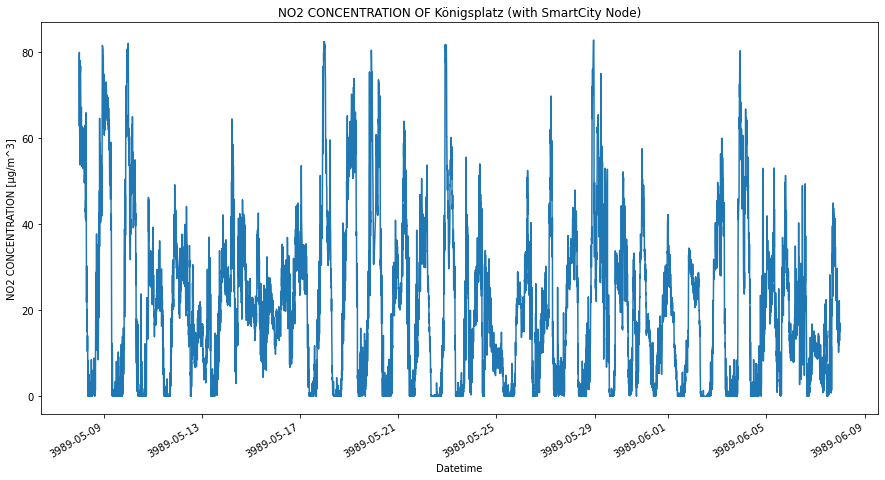

In [23]:
df_arima['no2'].plot(figsize=[15, 8])
plt.xlabel("Datetime")
plt.ylabel("NO2 CONCENTRATION [μg/m^3]")
plt.title("NO2 CONCENTRATION OF Königsplatz (with SmartCity Node)")
plt.show()


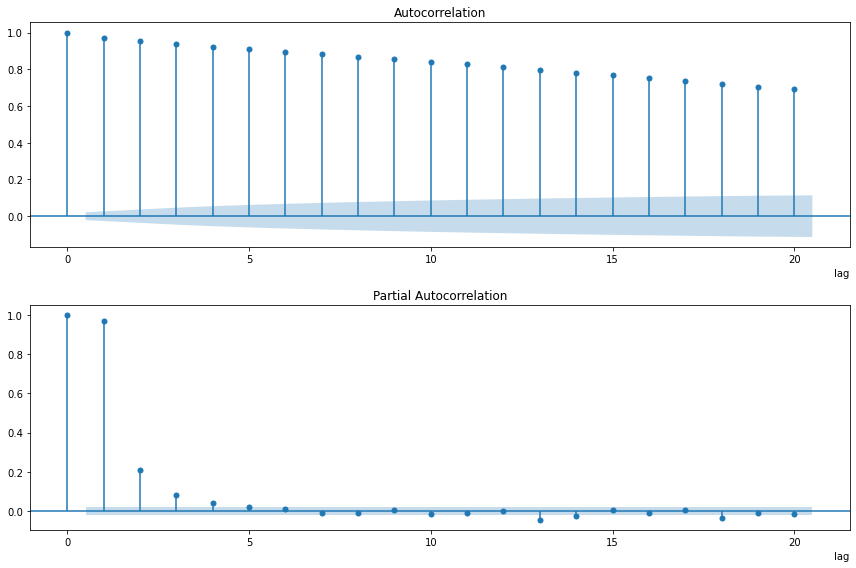

In [6]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_arima.no2,lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
plt.xlabel("lag",loc="right")
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_arima.no2,lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
plt.xlabel("lag",loc="right")
fig.tight_layout()

In [24]:
import itertools
d=range(0,1)
p=range(0,6)
q=range(0,6)
print("p=",p,"d=",d,"q=",q)
#产生不同的pdq元组,得到 p d q 全排列
pdq=list(itertools.product(p,d,q))
print("pdq:\n",pdq)


p= range(0, 6) d= range(0, 1) q= range(0, 6)
pdq:
 [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 5), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 0, 5), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 0, 3), (4, 0, 4), (4, 0, 5), (5, 0, 0), (5, 0, 1), (5, 0, 2), (5, 0, 3), (5, 0, 4), (5, 0, 5)]


In [21]:
df_arima.index = pd.DatetimeIndex(df_arima.index).to_period('5min')
for param in pdq:
    try:
        mod = sm.tsa.ARIMA(df_arima,
                            order=param)
        results = mod.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

ARIMA(0, 0, 0) - AIC:74379.77835272861
ARIMA(0, 0, 1) - AIC:65668.57982906402
ARIMA(0, 0, 2) - AIC:60653.891445175
ARIMA(0, 0, 3) - AIC:57765.076238939306
ARIMA(0, 0, 4) - AIC:55922.704594124356
ARIMA(0, 0, 5) - AIC:54674.13074186999
ARIMA(1, 0, 0) - AIC:50202.718373794385
ARIMA(1, 0, 1) - AIC:49724.4778384677
ARIMA(1, 0, 2) - AIC:49709.94023023333
ARIMA(1, 0, 3) - AIC:49710.68600766239
ARIMA(1, 0, 4) - AIC:49712.67214530593
ARIMA(1, 0, 5) - AIC:49713.972431334725
ARIMA(2, 0, 0) - AIC:49791.38592006315
ARIMA(2, 0, 1) - AIC:49708.94594896353
ARIMA(2, 0, 2) - AIC:49710.924240760694
ARIMA(2, 0, 3) - AIC:49712.68006099658
ARIMA(2, 0, 4) - AIC:49656.43479019799
ARIMA(3, 0, 0) - AIC:49727.39270790672
ARIMA(3, 0, 1) - AIC:49710.91968560267
ARIMA(3, 0, 2) - AIC:49712.66587929336
C:\Users\ThinkPad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


C:\Users\ThinkPad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
                              ARMA Model Results                              
Dep. Variable:                    no2   No. Observations:                 8640
Model:                     ARMA(4, 2)   Log Likelihood              -24819.551
Method:                       css-mle   S.D. of innovations              4.278
Date:                Mon, 30 Nov 2020   AIC                          49655.102
Time:                        12:41:39   BIC                          49711.615
Sample:                             0   HQIC                         49674.371
                                                                              
                 coef    std err          z      P>|z|      [0.0

<Figure size 864x576 with 0 Axes>

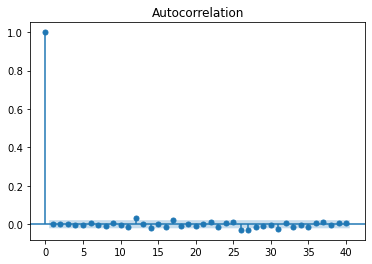

In [28]:
#fit arima models
import statsmodels.api as sm
model = sm.tsa.ARIMA(df_arima.no2, order=(4, 0, 2))
results = model.fit()
resid = results.resid 
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
print(results.summary())

datetime
2020-05-31 00:00:00    40.375754
2020-05-31 00:05:00    40.493786
2020-05-31 00:10:00    37.010914
2020-05-31 00:15:00    35.793253
2020-05-31 00:20:00    34.993861
                         ...    
2020-06-06 23:35:00    15.333236
2020-06-06 23:40:00    15.895996
2020-06-06 23:45:00    15.507850
2020-06-06 23:50:00    16.667471
2020-06-06 23:55:00    15.450349
Length: 1974, dtype: float64


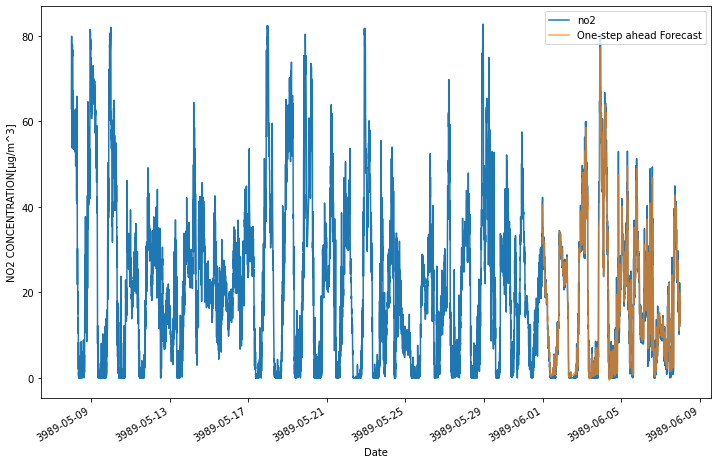

In [29]:
predict_sunspots = results.predict(start=pd.to_datetime('2020-05-31 00:00:00'),dynamic=False)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = df_arima.plot(ax=ax,label='observed')
#fig = results.plot_predict(start=pd.to_datetime('2020-06-01 00:00:00'),dynamic=False, ax=ax, plot_insample=False)
predict_sunspots.plot(ax=ax,label='One-step ahead Forecast', alpha=.7)
ax.set_xlabel('Date')
ax.set_ylabel('NO2 CONCENTRATION[μg/m^3]')
plt.legend()
plt.show()

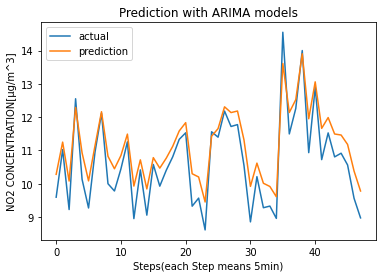

In [57]:
#test with the data of 06.06
no2 = df_arima["2020-06-06 00:00:00":"2020-06-06 03:55:00"].values
predict=results.predict(start=pd.to_datetime('2020-06-06 00:05:00'),end=pd.to_datetime('2020-06-06 04:00:00')).values
plt.plot(no2,label="actual")
plt.plot(predict,label="prediction")
plt.title("Prediction with ARIMA models")
plt.xlabel("Steps(each Step means 5min)")
plt.ylabel('NO2 CONCENTRATION[μg/m^3]')
plt.legend()
plt.show()

In [52]:
#evaluation
no2_forecasted=predict_sunspots
no2_truth= df_arima.no2['2020-05-31':]
no2_truth=no2_truth.dropna()
rmse = (((no2_forecasted - no2_truth) ** 2).mean()) ** 0.5
mae =np.mean(abs(no2_forecasted-no2_truth))
mape =np.mean(abs((no2_forecasted-no2_truth)/no2_truth))
smape=np.mean(abs(no2_forecasted-no2_truth)/(abs(no2_forecasted)+abs(no2_truth))/2)



print('The Root Mean Squared Error of our prediction is {}'.format(round(rmse, 3)))
print('The Mean Absolute Error of our prediction is {}'.format(round(mae, 3)))
print('The Root Mean Squared Error of our prediction is {}'.format(round(smape, 3)))

The Root Mean Squared Error of our prediction is 3.975
The Mean Absolute Error of our prediction is 2.614
The Root Mean Squared Error of our prediction is 0.139


In [18]:
#multi-steps forecast
print(results.forecast(36)[0])

[10.31479894 10.8313509  11.23346829 11.57820965 11.89941523 12.21020388
 12.51599198 12.81894188 13.11987624 13.41906451 13.71654877 14.01227861
 14.30616689 14.59811289 14.88801184 15.17575887 15.46125072 15.74438633
 16.02506722 16.30319754 16.57868415 16.85143665 17.12136735 17.38839133
 17.65242639 17.91339307 18.17121462 18.42581703 18.67712902 18.92508198
 19.16961002 19.41064994 19.64814119 19.88202591 20.11224886 20.33875744]


In [44]:
#evaluation of forecast
no2=df["no2"].values
no2_truth=no2[:24]



error =abs(results.forecast(24)[0] - no2_truth)/no2_truth
mape=np.mean(error)
rmse = (((results.forecast(24)[0] - no2_truth) ** 2).mean()) ** 0.5
mae =np.mean(abs(results.forecast(24)[0]-no2_truth))


print('The Root Mean Squared Error of our prediction is {}'.format(round(rmse, 3)))
print('The Mean Absolute Error of our prediction is {}'.format(round(mae, 3)))
print('The Mean Average Percentage Error of our prediction is {}'.format(round(mape, 3)))
print(no2_truth)


The Root Mean Squared Error of our prediction is 4.52
The Mean Absolute Error of our prediction is 3.9
The Mean Average Percentage Error of our prediction is 0.394
[ 9.594      11.025       9.2238     12.5517     10.1312      9.2707
 10.95122222 12.1181      9.9993      9.7809     10.4445     11.2575
  8.9511     10.4149      9.0553     10.5777      9.926      10.4029
 10.8081     11.3315     11.5287      9.3246      9.567       8.6115    ]
